### 从高维数据向低维数据的映射

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2)) # (100, 2)100行样本，2个特征
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100) # 100个元素的向量

### 调用我们自己封装的PCA函数

In [3]:
import sys
sys.path.append("../../")

In [4]:
from playML.PCA import PCA

pca = PCA(n_components=2) # 通过PCA仍然转换为两个维度，但是转换后的两个维度和原来的不同了
pca.fit(X) # 这样就是得到我们的新的坐标系的表示矩阵

PCA(n_components=2)

In [5]:
pca.components_

array([[ 0.75259886,  0.65847927],
       [-0.65847512,  0.7526025 ]])

In [6]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [7]:
pca.components_

array([[ 0.75259889,  0.65847924]])

In [8]:
X_reduction = pca.transform(X)

In [9]:
X_reduction.shape

(100, 1)

In [10]:
X_restore = pca.inverse_transform(X_reduction)

In [11]:
X_restore.shape # 其实就是一维主成分在原来坐标系里面的表示

(100, 2)

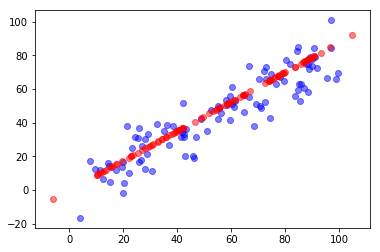

In [12]:
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5) # 坐标轴无法表示主成分，也就是不能表示某种重要性
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5) # 经过降维再恢复，在高维的空间里表达低维空间而已，完全可以放在一维轴上
plt.show() # 失去的信息无法再找回了

scikit-learn中的PCA

In [13]:
from sklearn.decomposition import PCA # 解组合是什么意思？sklearn.decomposition

In [14]:
pca = PCA(n_components=1) # 只取一个主成分
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_

array([[-0.75259891, -0.65847922]])

In [17]:
X_reduction = pca.transform(X) # 对输入数据进行降维

In [19]:
X_reduction.shape

(100, 1)

In [21]:
X_restore = pca.inverse_transform(X_reduction) # 对降维后的数据进行恢复

In [22]:
X_restore.shape

(100, 2)

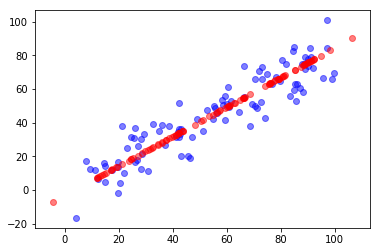

In [23]:
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)
plt.show()